### Clustering
The most prominent clustering algorhithm is K-Means. The goal of this tutorial is to implement the K-Means algorithm using Python. Furhtermore you are asked to test your implementation on a small data set.

In [1]:
# imports
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

%matplotlib inline

First of all, we create a data set with 3 different clusters and 300 samples

In [2]:
n_samples = 300
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here

# Generate 3 blobs
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

<b>Exercise 1</b>: 

Create an image showing the 3 different clusters.

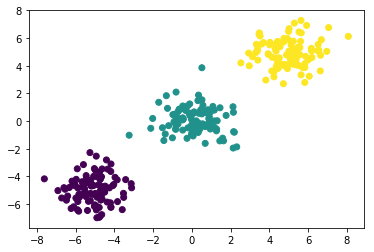

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Now we want to implement the K-Means algorithm. To do so you have to implement 3 functions: findMapping, findMeans, and kmeans.

<b>Excercise 2:</b>

Create the function findMapping(X,Means) that calculates for the given cluster means $Means$ a mapping
$R$ of the data points in $X$ to the clusters (Expectation step of K-Means). Here $X \in \mathbb{R}^{n \times m}$ denotes a n by m matrix with n
instances and m numerical features. $Means \in \mathbb{R}^{k \times m}$ denotes a k by m matrix with k m-dimensional cluster centers. The function findMapping should return a matrix $R \in \mathbb{R}^{n \times k}$ defined as follows:
$$R_{i,j} = \begin{cases} 1, & \mbox{if instance } n\mbox{ belongs to cluster } j\\ 0, & \mbox{otherwise}. \end{cases}$$

In [4]:
import sys

def findMapping(X,Means):
    n, m = X.shape
    k = Means.shape[0]
    R = np.zeros([n,k])
    
    for instance_id, instance in enumerate(X):
        min_distance, k = sys.maxsize, -1
        for cluster_id, cluster_features in enumerate(Means):
            distance = np.linalg.norm(instance - cluster_features)
            if distance < min_distance:
                min_distance = distance
                k = cluster_id
        R[instance_id, k] = 1
    return R

<b>Excercise 3:</b>
    
Create the function findMeans(X,R) that calculates new cluster centers $Means \in \mathbb{R}^{k \times m}$ for the data points in $X$ and the cluster assignments in $R$. Here, $X$ and $R$ are defined as shown in excercise 2.

In [5]:
def findMeans(X,R):
    Means = np.dot(R.T, X)
    count = np.sum(R, axis=0)
    Means = np.nan_to_num((Means.T / count).T)
    return Means

<b>Excercise 4:</b>

Write the function kmeans(X,k) that computes with the help of the K-Means algorithms $k$ clusters and the cluster centers $Means$. The matrix $X$ is defined as shown in excercise 2 and $k$ is the number of clusters. The function should return a vector $y \in \mathbb{R}^{n}$. This vector contains for every data point in $X$ the cluster-number $\in 0 \dots (k-1)$. Furhtermore the matrix $Means$ containing the cluster centers should be returned.

In [6]:
def kmeans(X,k):
    n,m = X.shape
    y = np.zeros([n,])
    Means = np.zeros([k, m])
    R = np.zeros([n, k])
    
    while True:
        R_new = findMapping(X, Means)
        Means = findMeans(X, R_new)
        if np.array_equal(R_new, R):
            break
        R = R_new    
        
    y = np.argmax(R, axis=1)
    return (Means,y)

<b>Excercise 5:</b>
Cluster the data $X$ using your clustering algorihm and show the results in a figure including the cluster centers.

/home/madness/venv3/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


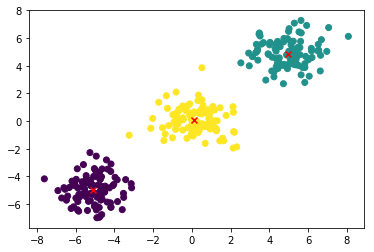

In [7]:
(Means,y) = kmeans(X,3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(Means[:, 0], Means[:, 1], c='red', marker='x')

<b>Excercise 6:</b>

Create different data sets with the function make_blobs shown above. Vary the number of samples and clusters. Investigate the behaviour of the K-Means algorithm for $k < p$,$k=p$,$k>p$, where p is the number of clusters.


/home/madness/venv3/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


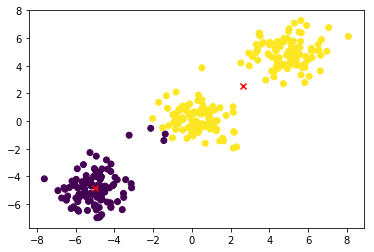

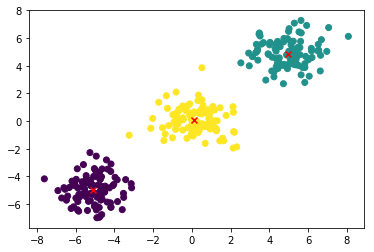

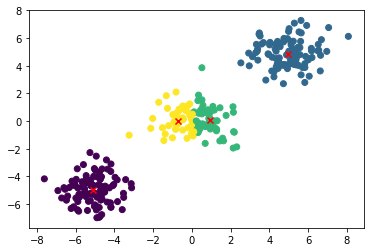

In [8]:
k = 3
for p in range(k-1, k+2):
    (Means,y) = kmeans(X,p)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.scatter(Means[:, 0], Means[:, 1], c='red', marker='x')
    plt.show()